In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2006 = "../../datasets/subsets/inst_ex/inst_ex_2006.csv"

inst_2006 = pd.read_csv(file_2006)
inst_2006 = inst_2006.set_index(['STNAME'])
inst_2006

,2006_E11,2006_E12,2006_E13,2006_E14,2006_E15,2006_E16,2006_E17,2006_E18,2006_E11A,2006_E11B,2006_E11C,2006_E11D,2006_E2
STNAME,,,,,,,,,,,,,
alabama,2175489042,785451414,88963202,2899939.0,4.634460e+05,267903434,6410373,12374024.0,1.547399e+09,2.702495e+08,103060191.0,31595980.0,54654671.0
alaska,551604528,223009277,49074469,NaN,NaN,42269974,7561600,8645424.0,NaN,NaN,NaN,NaN,NaN
arizona,3434476964,634617858,156342973,6053177.0,1.908460e+07,159898431,125084667,26840242.0,NaN,NaN,NaN,NaN,NaN
arkansas,1591695691,409857095,65222296,8077867.0,5.541051e+06,200079253,29174514,17153301.0,1.049757e+09,1.614875e+08,82585855.0,128450991.0,41212967.0
california,21714002608,6906542947,1244453344,693884790.0,3.221285e+08,1682409648,36235279,3273287.0,1.632013e+10,2.471221e+09,128097647.0,713973610.0,423712993.0
colorado,2547089097,569916903,83895288,49376931.0,6.386936e+06,263930515,50750526,62780246.0,1.834671e+09,3.002462e+08,82543325.0,85381602.0,58002963.0
connecticut,3107054505,1108456056,140708880,284136388.0,5.035632e+07,114910156,30961436,7075003.0,2.027218e+09,3.295263e+08,34745503.0,103496895.0,NaN
delaware,539576609,231696607,20142985,6776803.0,5.142696e+07,40626996,3038210,9439002.0,3.346215e+08,1.033995e+08,16033739.0,20333887.0,8807130.0
district of columbia,347191986,41199792,17803211,140103284.0,NaN,4450500,19995979,NaN,1.947120e+08,3.389674e+07,3936198.0,13214232.0,4412988.0


In [3]:
(inst_2006.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      52.660068
new york        29.057564
pennsylvania    21.785368
texas           20.312049
new jersey      20.140099
dtype: float64

In [10]:
summary_2006 = pd.DataFrame(inst_2006.sum(axis=1)/100000000, columns=['Total InstructionalEx ($100M)'])
summary_2006['InstructionalEx ($100M)'] = inst_2006.iloc[:,0:8].sum(axis=1)/100000000
summary_2006['Teacher Salaries ($100M)'] = inst_2006.iloc[:,8:13].sum(axis=1)/100000000
summary_2006

,Total InstructionalEx ($100M),InstructionalEx ($100M),Teacher Salaries ($100M)
STNAME,,,
alabama,53.469139,33.399549,20.069590
alaska,8.821653,8.821653,0.000000
arizona,45.623989,45.623989,0.000000
arkansas,37.902954,23.268011,14.634943
california,526.600678,326.029304,200.571374
colorado,59.949716,36.341264,23.608451
connecticut,73.386457,48.436587,24.949869
delaware,13.859199,9.027242,4.831958
district of columbia,8.209169,5.707448,2.501722


In [11]:
summary_pct = pd.DataFrame(summary_2006['InstructionalEx ($100M)'] / summary_2006['Total InstructionalEx ($100M)'] *100, columns = ['Instructional (%)'])
summary_pct['Teacher Salaries (%)'] = summary_2006['Teacher Salaries ($100M)'] / summary_2006['Total InstructionalEx ($100M)'] *100
summary_pct

,Instructional (%),Teacher Salaries (%)
STNAME,,
alabama,62.465095,37.534905
alaska,100.000000,0.000000
arizona,100.000000,0.000000
arkansas,61.388384,38.611616
california,61.912055,38.087945
colorado,60.619578,39.380422
connecticut,66.002079,33.997921
delaware,65.135378,34.864622
district of columbia,69.525277,30.474723


In [12]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2006.csv"

success_2006 = pd.read_csv(dropout_path)
success_2006

,STNAME,2006_DRP912,2006_DRP9,2006_DRP10,2006_DRP11,2006_DRP12,2006_DRPAM,2006_DRPAS,2006_DRPHI,2006_DRPBL,2006_DRPWH
0,alabama,2.5,1.9,2.6,2.8,2.9,1.3,1.2,2.9,2.9,2.3
1,alaska,8.0,4.8,7.5,8.9,11.3,11.7,6.9,9.7,10.0,6.2
2,arizona,7.6,4.9,6.0,8.0,13.0,NaN,4.4,9.3,8.1,NaN
3,arkansas,3.1,1.8,3.0,4.1,3.9,2.5,2.4,3.8,4.2,2.7
4,california,3.7,2.3,2.3,3.0,8.1,4.4,1.8,4.8,6.5,2.3
5,colorado,7.8,5.7,7.4,8.5,10.1,13.5,4.8,15.8,12.5,4.7
6,connecticut,2.0,1.9,1.9,2.3,1.9,2.3,0.7,4.6,2.8,1.3
7,delaware,5.5,6.5,5.7,5.3,4.0,6.8,2.9,9.8,7.3,4.2
8,district of columbia,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN,4.0
9,florida,4.1,3.7,3.7,4.2,4.9,3.7,1.7,5.0,5.8,2.9


In [13]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
alabama,62.465095,37.534905,2.5
alaska,100.000000,0.000000,8
arizona,100.000000,0.000000,7.6
arkansas,61.388384,38.611616,3.1
california,61.912055,38.087945,3.7
colorado,60.619578,39.380422,7.8
connecticut,66.002079,33.997921,2
delaware,65.135378,34.864622,5.5
district of columbia,69.525277,30.474723,NaN


In [14]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
louisiana,62.642393,37.357607,8.4
alaska,100.000000,0.000000,8
colorado,60.619578,39.380422,7.8
nevada,60.459543,39.540457,7.7
arizona,100.000000,0.000000,7.6
wyoming,63.050277,36.949723,5.7
washington,62.347063,37.652937,5.6
delaware,65.135378,34.864622,5.5
new mexico,59.396336,40.603664,5.5


In [15]:
summary_2006['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_2006['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_2006 = summary_2006[summary_2006['Dropout Rate'].notna()]
summary_2006['Dropout Rate'] = summary_2006['Dropout Rate'].astype(float)
summary_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total InstructionalEx ($100M)  47 non-null     float64
 1   InstructionalEx ($100M)        47 non-null     float64
 2   Teacher Salaries ($100M)       47 non-null     float64
 3   Dropout Rate                   47 non-null     float64
dtypes: float64(4)
memory usage: 1.8+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_pct['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructional (%)     47 non-null     float64
 1   Teacher Salaries (%)  47 non-null     float64
 2   Dropout Rate          47 non-null     float64
dtypes: float64(3)
memory usage: 1.5+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


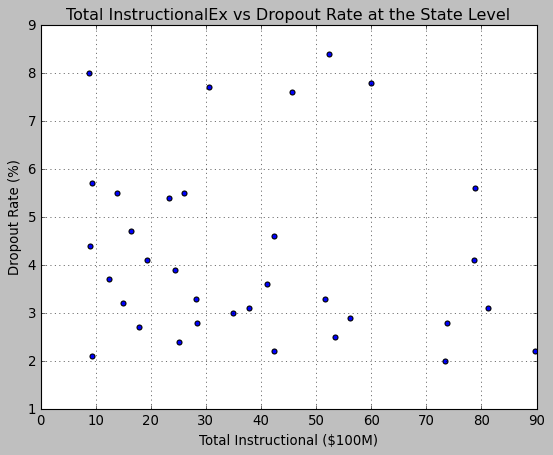

In [19]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2006['Total InstructionalEx ($100M)'], summary_2006['Dropout Rate'])
plt.xlabel('Total Instructional ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total InstructionalEx vs Dropout Rate at the State Level")
plt.grid()

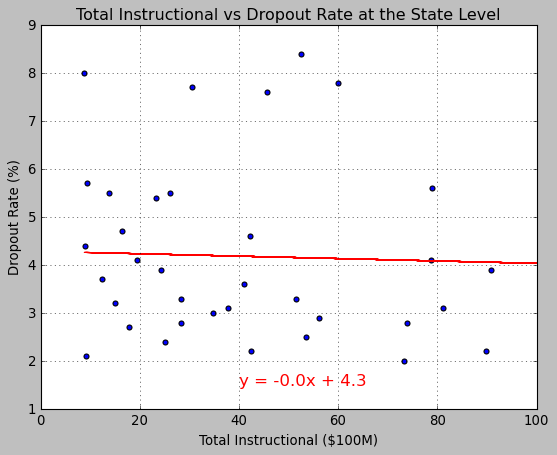

The correlation between both factors is -0.1405


In [21]:
# Total Instructional vs Dropout Rate
x_values = summary_2006['Total InstructionalEx ($100M)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

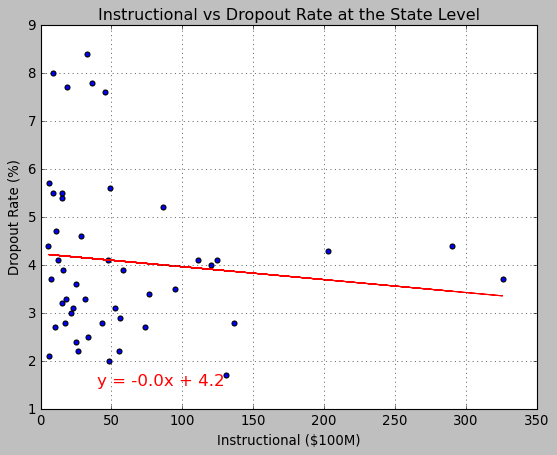

The correlation between both factors is -0.11


In [31]:
# Total Instructional vs Dropout Rate
x_values = summary_2006['InstructionalEx ($100M)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 350)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

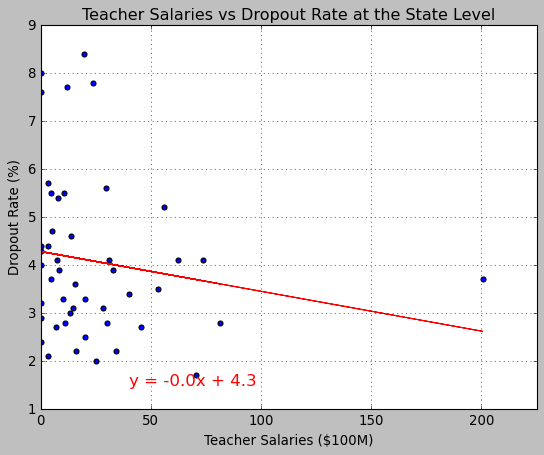

The correlation between both factors is -0.1675


In [26]:
# Teacher Salaries vs Dropout Rate
x_values = summary_2006['Teacher Salaries ($100M)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 225)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

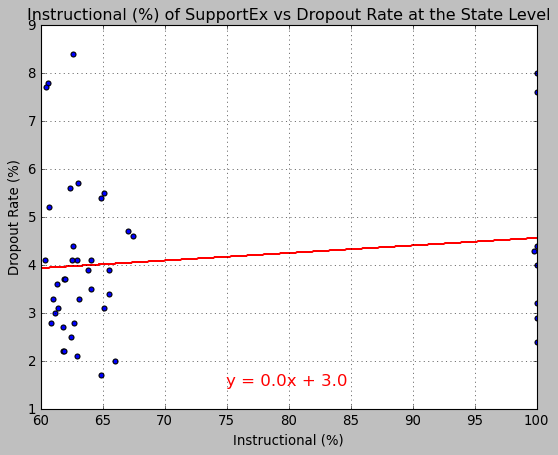

The correlation between both factors is 0.1338


In [35]:
# Instructional (%) vs Dropout Rate
x_values = summary_pct['Instructional (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1.5),fontsize=15,color="red")
plt.xlabel('Instructional (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 60, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

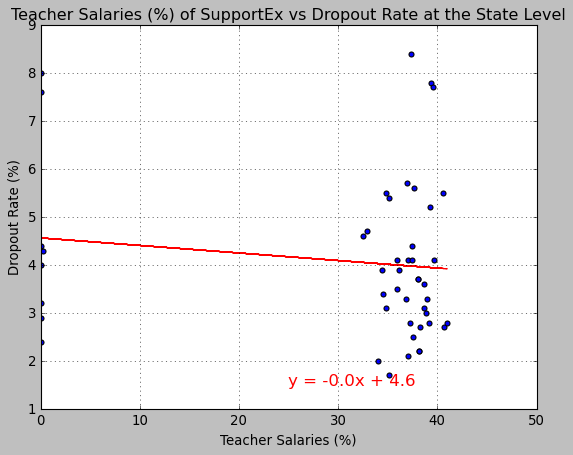

The correlation between both factors is -0.1338


In [40]:
# Teacher Salaries (%) vs Dropout Rate
x_values = summary_pct['Teacher Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")